# Rodriguez, I. MIS 665, 10 DEC 2019
# FINAL PROJECT, IMDB DATA PREDICTIVE ANALYSIS
K-State Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [98]:
# load key data analysis packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot as skplt

# Visualization Tools

# load plotly visualization functionality
import plotly.graph_objects as go
import plotly.express as px

# load seaborn visualization functionality
import seaborn as sns

# load scatter_matrix functionality
from pandas.plotting import scatter_matrix
# load scatter_matrix functionality

# load plotly visualization functionality
import plotly.graph_objects as go
import plotly.express as px

# load seaborn visualization functionality
import seaborn as sns
%matplotlib inline


# Statistics Tools

# load  pingouin statistics functionality
import pingouin as pg

# f regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

#stats model
import statsmodels.api as sm
from statsmodels.formula.api import ols

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG

#from graphviz import Source
from IPython.display import display

#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#for validating your classification model
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#linear model
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score


import warnings
warnings.filterwarnings("ignore")

# Summary of Phase I (Midterm Project)



# Predicting Movie Success using the IMDB database

## Which factors best predict the success of movies within the IMDB database?

### IMDB Database
- Internet Movie Database came online in 1990
- A reference for users with movie details and user-generated rankings
- For details see https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=helpsect_cons_1_1#


### Success: A movie's IMDB score

- 4626 Movies considered
- IMDB Score Statistics:  Median Score: 6.5 Max Score: 9.3 Min Score: 1.6
- IMDB Scores show more variance in recent years
- 18 Variables Considered in the Study: 10 numerical, 4 categorical, 3 biographical, 1 datetime index

The following chart depicts the range of IMDB scores:

## Determining Success:  Two broad approaches

### Financial Approach 
- Conventional wisdom:  Movie success should align with financial success.
- IMDB collects key information on movie gross and movie budget, allowing for a basic calculation of profit
- After correcting for a small set of outliers:
    - Mean Gross: 49.16 Million
    - Mean Budget: 35.08 Million
    - Mean Profit: 14.09 Million
    
### Data Driven Approach
- Correlation of data reveals stronger relationships than those of financial considerations
- Top 3 Variables:  
    - num_voted_users 0.442
    - duration 0.361
    - num_critic_for_reviews 0.343
- Bottom 3 Variables
    - gross: 0.181
    - cast_total_facebook_likes: 0.101
    - budget: 0.030
- This suggests that movie success relates closely to the opinions of moviegoers

## Application of Analysis:

- Correlation and Segmentation Analysis form the basis for additional predictive insights
- While these insights alone will not predict success, these next two steps can answer two useful questions:
    - What does a good movie look like?
    - What movies are the very best of the best?
    - With additional modifications, correlation and segmentation could also form the basis for predictive modeling
  
## Quintessential Movies within this Tier: The Untouchables and The Fugitive

What top quintile movies are closest to the means for each of the two attributes most closely correlated with imdb score?

In other words, if a movie has traits similar to these, it will be successful.

- IMDB Score (mean = 7.8, corr=1): A score between 7.7 and 8.0
- Number of Voted Users(mean = 214,888, corr = 0.601 ): a total between 209k and 219k users
- Number User for Review (mean = 538, corr = 0.343): a total between 238 and 838 users
- Movie Facebook Likes (mean = 18557, corr = 0.262): not used as a filter.
- See Appendix 4 for details

The Untouchables (1987)

- Score: 7.9
- Number of Voted Users: 219008
- Number User for Review: 418
- Movie Facebook Likes: 0
- Duration: 119 

The Fugitive (1993)

- Score: 7.8
- Number of Voted Users: 219008
- Number User for Review: 270
- Movie Facebook Likes: 0
- Duration: 123

# Recap of initial finding:  

- IMDB data required significant preparation
- There were several ways to segment the IMDB data set
- Correlation Analysis revealed several strong relationships
- It was possible to develop a labor intensive model of quintessential top tier movies

### IMDB Score vs. Number of Voted Users by Film Language

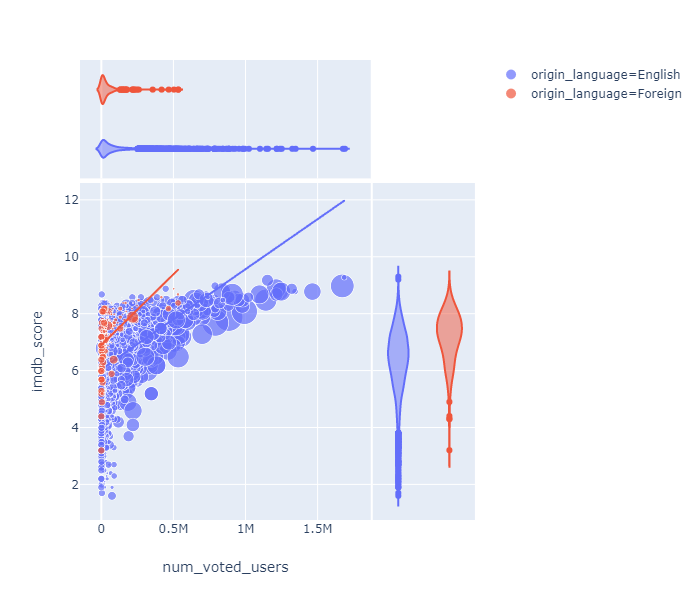



### IMDB Score vs. Number of Voted Users by Film Origin

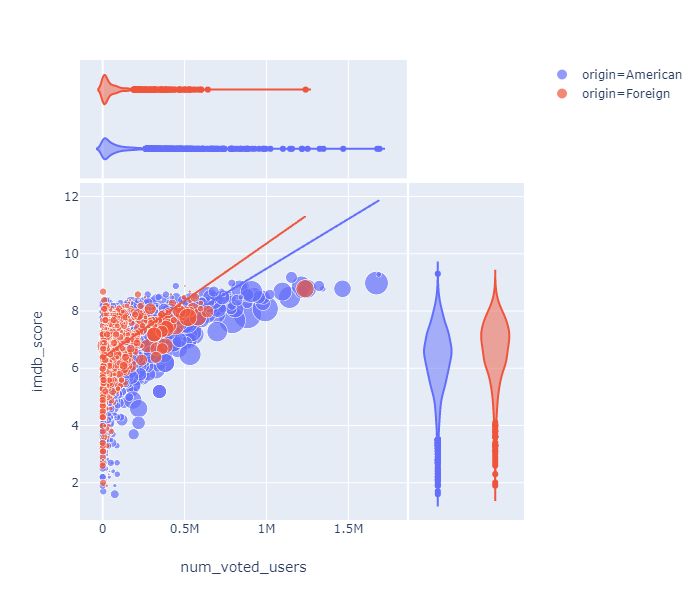

### IMDB Score vs. Number of Voted Users by IMDB Score Quintile

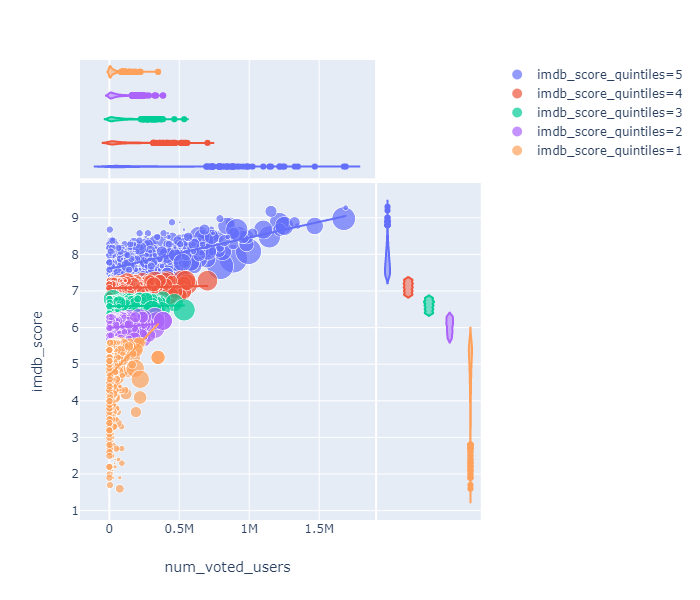

# Phase II IMDB Predictive and Clustering Analysis (Final Project)

## Data Cleaning and Preparation:  

- Data Quality: 
    - Phase I included extensive data preparation

- Data Transformations:
    - Dropped extraneous columns
    - Created new imdb score quadriles
    - Filtered for modern content ratings
    - Created dummy variables for content ratings, foreign language, and foreign production
    

In [99]:
# m3 = pd.read_csv("data/movies3.csv")
m3 = pd.read_csv("https://raw.githubusercontent.com/irrodrig/finalProject/master/data/movies3.csv")

In [100]:
m3.head(1)

year_index  num_critic_for_reviews  duration  director_facebook_likes  \
0  2009-01-01                   723.0     178.0                      0.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   

                            genres movie_title  num_voted_users  ...  \
0  Action|Adventure|Fantasy|Sci-Fi     Avatar            886204  ...   

   content_rating       budget  title_year actor_2_facebook_likes imdb_score  \
0           PG-13  237000000.0      2009.0                  936.0        7.9   

  movie_facebook_likes       profit  foreign_film    origin  origin_language  
0                33000  523505847.0           USA  American          English  

[1 rows x 25 columns]

In [101]:
# drop extraneous columns
m3 = m3.drop(['movie_imdb_link'], axis=1)

# simplify column names
# m2.rename(columns={'num_user_for_reviews': 'reviewers', 'content_rating': 'rating','year_index': 'yearindex','director_name': 'director', 'num_critic_for_reviews': 'critical', 'movie_title': 'title','num_voted_users': 'votedusers', 'cast_total_facebook_likes': 'castfacebook','imdb_score': 'score', 'origin_language': 'originlanguage','foreign_film': 'foreign','movie_facebook_likes': 'facebook','num_user_for_reviews': 'reviewers', 'content_rating': 'rating'}, inplace=True)


m3.head(2)

year_index  num_critic_for_reviews  duration  director_facebook_likes  \
0  2009-01-01                   723.0     178.0                      0.0   
1  2007-01-01                   302.0     169.0                    563.0   

   actor_3_facebook_likes  actor_1_facebook_likes        gross  \
0                   855.0                  1000.0  760505847.0   
1                  1000.0                 40000.0  309404152.0   

                            genres                                movie_title  \
0  Action|Adventure|Fantasy|Sci-Fi                                    Avatar    
1         Action|Adventure|Fantasy  Pirates of the Caribbean: At World's End    

   num_voted_users  ...  content_rating       budget title_year  \
0           886204  ...           PG-13  237000000.0     2009.0   
1           471220  ...           PG-13  300000000.0     2007.0   

  actor_2_facebook_likes imdb_score  movie_facebook_likes       profit  \
0                  936.0        7.9                 33000  523505847.0   
1                 5000.0        7.1                     0    9404152.0   

   foreign_film    origin  origin_language  
0           USA  American          English  
1           USA  American          English  

[2 rows x 24 columns]

In [102]:
# Categorical transformations

In [103]:
#  Create score categories for use in categorical analysis

m3['score_quads'] = pd.qcut(m3['imdb_score'], 4, labels=['1', '2', '3', '4'])


In [104]:
px.scatter(m3, x="title_year", y="imdb_score", color="score_quads", size='gross', trendline="ols", hover_name='movie_title')


In [105]:
# Categorical transformations:  imdb score, rating, origin, language

In [106]:
# Tranform ratings into categorical values

In [107]:
m3.groupby('content_rating').size().sort_values(ascending=False)



content_rating
R            2089
PG-13        1441
PG            694
Not Rated     113
G             112
Unrated        60
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-PG           3
TV-14           3
dtype: int64

In [108]:
# filter and  remove movies with teleevision rating schemes
# filter and remove movies with old, irrelevent rating schemes

# This step involved examined the timeframe various ratings were in use.
# This resulted in the removal of these ratings: Approved, Passed, GP, M, TV-G,TV-PG,TV-14
# As a final step, combined unrated and not rated into a single category


m3[(m3['content_rating'] == 'Not Rated')].sort_values('year_index').head()

# Approved movies timeframe 1933-1967
# Passed movies timeframe 1921-1951
# GP timeframe 1969 to 1972
# M timeframe 1967-1969
# TV-G 1965-2012(Notably High School Musical 1 and 2)
# TV-PG 2010-2011
# TV-14 2010-2015(Notably Sharknado)






year_index  num_critic_for_reviews  duration  director_facebook_likes  \
2624  1927-01-01                   260.0     145.0                    756.0   
4342  1929-01-01                    71.0     110.0                     21.0   
4133  1939-01-01                    96.0     120.0                    964.0   
4190  1940-01-01                   144.0     130.0                  13000.0   
4192  1945-01-01                    97.0     101.0                      0.0   

      actor_3_facebook_likes  actor_1_facebook_likes       gross  \
2624                    18.0                   136.0     26435.0   
4342                     3.0                   426.0      9950.0   
4133                   248.0                   607.0  48468407.0   
4190                   333.0                  1000.0  48468407.0   
4192                    66.0                   287.0  48468407.0   

                                genres                    movie_title  \
2624                      Drama|Sci-Fi                    Metropolis    
4342               Crime|Drama|Romance                 Pandora's Box    
4133                      Comedy|Drama  Mr. Smith Goes to Washington    
4190  Drama|Film-Noir|Mystery|Thriller                       Rebecca    
4192                   Drama|Film-Noir              The Lost Weekend    

      num_voted_users  ...      budget  title_year actor_2_facebook_likes  \
2624           111841  ...   6000000.0      1927.0                   23.0   
4342             7431  ...  39752620.0      1929.0                   20.0   
4133            77392  ...   1500000.0      1939.0                  319.0   
4190            87424  ...   1288000.0      1940.0                  991.0   
4192            24959  ...   1250000.0      1945.0                  160.0   

     imdb_score movie_facebook_likes      profit  foreign_film    origin  \
2624        8.3                12000  -5973565.0       Germany   Foreign   
4342        8.0                  926 -39742670.0       Germany   Foreign   
4133        8.2                    0  46968407.0           USA  American   
4190        8.2                    0  47180407.0           USA  American   
4192        8.0                    0  47218407.0           USA  American   

      origin_language  score_quads  
2624          Foreign            4  
4342          Foreign            4  
4133          English            4  
4190          English            4  
4192          English            4  

[5 rows x 25 columns]

In [109]:
m3 = m3[(m3['content_rating'] != 'Approved' )]

In [110]:
m3 = m3[(m3['content_rating'] != 'Passed' )]
m3 = m3[(m3['content_rating'] != 'TV-G' )]
m3 = m3[(m3['content_rating'] != 'TV-PG' )]
m3 = m3[(m3['content_rating'] != 'TV-14')]
m3 = m3[(m3['content_rating'] != 'M')]
m3 = m3[(m3['content_rating'] != 'GP')]

In [111]:
m3.groupby('content_rating').size().sort_values(ascending=False)


content_rating
R            2089
PG-13        1441
PG            694
Not Rated     113
G             112
Unrated        60
X              13
NC-17           7
dtype: int64

In [112]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 25 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
content_rating               4529 non-null object
budget                       4529 non-null float64
title_year                   4529 non-null float64
actor_2_facebook_likes       4529 no

In [113]:
px.scatter(m3, x="num_voted_users", y="imdb_score", color="content_rating", size='gross', trendline="ols", hover_name='movie_title')


In [114]:
# Set dataframe for regression analysis
m3Regression = m3
m3Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 25 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
content_rating               4529 non-null object
budget                       4529 non-null float64
title_year                   4529 non-null float64
actor_2_facebook_likes       4529 no

In [115]:
# Set dataframe from classification analysis by creating dummy variables for rating, origin, and originlanguage values

m3 =  pd.get_dummies(m3, columns=["content_rating", "origin", "origin_language"],
                         prefix=["rating", "origin", "originlang"], drop_first=True)

# Correlation Analysis

- Two Dataframes developed: 
    - m3Regression:  Dataframe without dummy variables.  Includes only continous IMDB scores
    - m3:  Comprehensive dataframe with dummy variables.  Includes categorical IMDB scores


In [116]:
m3Regression.corr()

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.259948   
duration                                 0.259948  1.000000   
director_facebook_likes                  0.179328  0.184439   
actor_3_facebook_likes                   0.257717  0.132207   
actor_1_facebook_likes                   0.189729  0.099726   
gross                                    0.450114  0.249015   
num_voted_users                          0.613245  0.356991   
cast_total_facebook_likes                0.258498  0.136205   
num_user_for_reviews                     0.592001  0.368067   
budget                                   0.466323  0.293857   
title_year                               0.322651 -0.141947   
actor_2_facebook_likes                   0.268501  0.140441   
imdb_score                               0.355673  0.367885   
movie_facebook_likes                     0.691031  0.226542   
profit                                   0.200700  0.082272   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.179328                0.257717   
duration                                  0.184439                0.132207   
director_facebook_likes                   1.000000                0.122494   
actor_3_facebook_likes                    0.122494                1.000000   
actor_1_facebook_likes                    0.096364                0.257009   
gross                                     0.140925                0.286448   
num_voted_users                           0.301537                0.271807   
cast_total_facebook_likes                 0.125216                0.484514   
num_user_for_reviews                      0.222726                0.217470   
budget                                    0.098207                0.268083   
title_year                               -0.074801                0.099270   
actor_2_facebook_likes                    0.120220                0.552700   
imdb_score                                0.183960                0.064808   
movie_facebook_likes                      0.162087                0.264962   
profit                                    0.101153                0.150716   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.189729  0.450114         0.613245   
duration                                 0.099726  0.249015         0.356991   
director_facebook_likes                  0.096364  0.140925         0.301537   
actor_3_facebook_likes                   0.257009  0.286448         0.271807   
actor_1_facebook_likes                   1.000000  0.145959         0.194363   
gross                                    0.145959  1.000000         0.619943   
num_voted_users                          0.194363  0.619943         1.000000   
cast_total_facebook_likes                0.948373  0.230738         0.262398   
num_user_for_reviews                     0.143428  0.545482         0.793387   
budget                                   0.172231  0.621534         0.406237   
title_year                               0.083510  0.026447         0.001874   
actor_2_facebook_likes                   0.392087  0.249063         0.256569   
imdb_score                               0.095677  0.185630         0.449661   
movie_facebook_likes                     0.136675  0.363395         0.530471   
profit                                   0.048232  0.778176         0.465651   

                           cast_total_facebook_likes  num_user_for_reviews  \
num_critic_for_reviews                      0.258498              0.592001   
duration                                    0.136205              0.368067   
director_facebook_likes                     0.125216              0.222726   
actor_3_facebook_likes                      0.484514              0.217470   
actor_1_facebook_likes                      0.948373              0.143428   
gross               

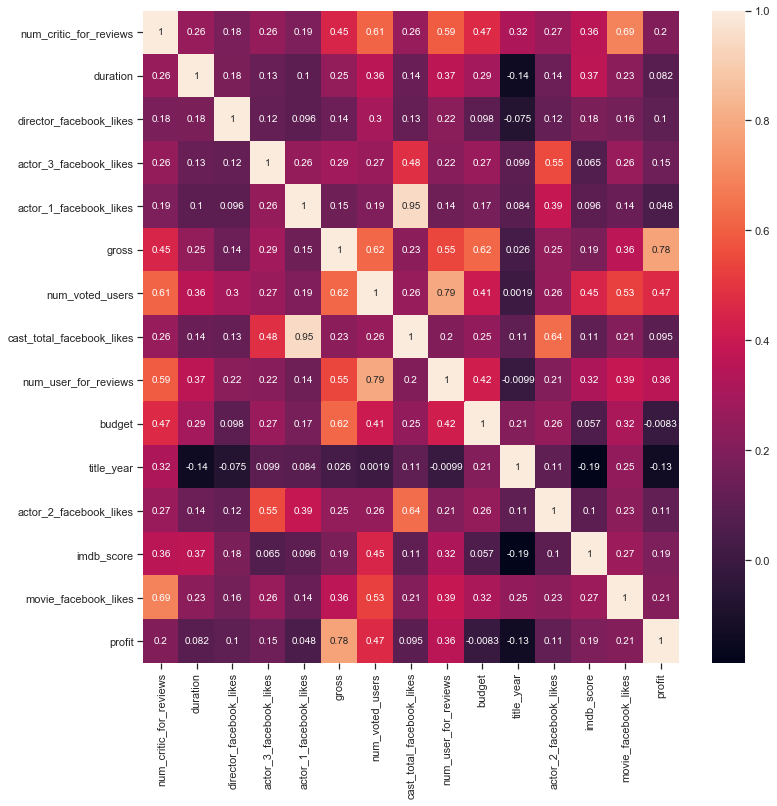

In [117]:
# Correlation Heatmap

plt.figure(figsize=(12,12))
sns.heatmap(m3Regression.corr(), annot=True)


In [118]:
m3Regression.corr()['imdb_score'].sort_values(ascending=False)


imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
actor_3_facebook_likes       0.064808
budget                       0.057063
title_year                  -0.187301
Name: imdb_score, dtype: float64

In [119]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 31 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
budget                       4529 non-null float64
title_year                   4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 n

In [120]:
m3.corr()


num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.259948   
duration                                 0.259948  1.000000   
director_facebook_likes                  0.179328  0.184439   
actor_3_facebook_likes                   0.257717  0.132207   
actor_1_facebook_likes                   0.189729  0.099726   
gross                                    0.450114  0.249015   
num_voted_users                          0.613245  0.356991   
cast_total_facebook_likes                0.258498  0.136205   
num_user_for_reviews                     0.592001  0.368067   
budget                                   0.466323  0.293857   
title_year                               0.322651 -0.141947   
actor_2_facebook_likes                   0.268501  0.140441   
imdb_score                               0.355673  0.367885   
movie_facebook_likes                     0.691031  0.226542   
profit                                   0.200700  0.082272   
rating_NC-17                             0.011068 -0.011780   
rating_Not Rated                        -0.074137 -0.004879   
rating_PG                               -0.104880 -0.070421   
rating_PG-13                             0.133436  0.087540   
rating_R                                 0.007639  0.004263   
rating_Unrated                          -0.069360 -0.029558   
rating_X                                -0.000691 -0.039140   
origin_Foreign                          -0.023177  0.032983   
originlang_Foreign                      -0.041052  0.041306   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.179328                0.257717   
duration                                  0.184439                0.132207   
director_facebook_likes                   1.000000                0.122494   
actor_3_facebook_likes                    0.122494                1.000000   
actor_1_facebook_likes                    0.096364                0.257009   
gross                                     0.140925                0.286448   
num_voted_users                           0.301537                0.271807   
cast_total_facebook_likes                 0.125216                0.484514   
num_user_for_reviews                      0.222726                0.217470   
budget                                    0.098207                0.268083   
title_year                               -0.074801                0.099270   
actor_2_facebook_likes                    0.120220                0.552700   
imdb_score                                0.183960                0.064808   
movie_facebook_likes                      0.162087                0.264962   
profit                                    0.101153                0.150716   
rating_NC-17                             -0.007508               -0.009029   
rating_Not Rated                         -0.024884               -0.046372   
rating_PG                                 0.008985                0.004196   
rating_PG-13                              0.010050                0.103417   
rating_R                                  0.006833               -0.065636   
rating_Unrated                           -0.014881               -0.037377   
rating_X                                 -0.011418               -0.013660   
origin_Foreign                           -0.081653               -0.088107   
originlang_Foreign                       -0.030921               -0.078177   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.189729  0.450114         0.613245   
duration                                 0.099726  0.249015         0.356991   
director_facebook_likes                  0.096364  0.140925         0.301537   
actor_3_facebook_likes                   0.257009  0.286448         0.271807   
actor_1_facebook_likes                   1.000000  0.145959         0.194363   
gross               

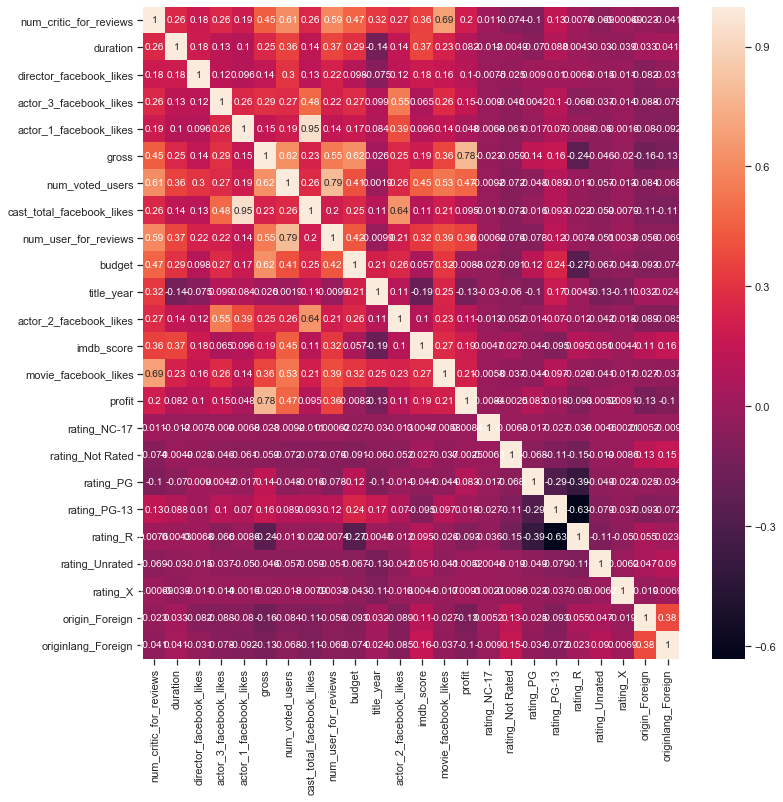

In [121]:
plt.figure(figsize=(12,12))
sns.heatmap(m3.corr(), annot=True)


In [122]:
m3.corr()['imdb_score'].sort_values(ascending=False)


imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
originlang_Foreign           0.155080
origin_Foreign               0.111176
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
rating_R                     0.094539
actor_3_facebook_likes       0.064808
budget                       0.057063
rating_Unrated               0.050859
rating_Not Rated             0.026706
rating_NC-17                 0.004722
rating_X                     0.004356
rating_PG                   -0.044016
rating_PG-13                -0.095195
title_year                  -0.187301
Name: imdb_score, dtype: float64

# Regression Models

- Five regression models built:
    - All models used the m3Regression dataframe
    - Overall models did not perform especially well
    - Rank order of Models by R-squared value:
        - Lasso Linear Regression R-squared 0.323
        - Extra Tree Classifier Feature Selection R-squared 0.315
        - Ordinary Least Squared with all variables R-squared 0.293
        - Feature Selection R-squared 0.274
        - Ordinary Least Squared with top four variables R-squared 0.272

In [123]:
m3Regression.corr()['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
actor_3_facebook_likes       0.064808
budget                       0.057063
title_year                  -0.187301
Name: imdb_score, dtype: float64

In [124]:
# Initial model with all variables

m3OLSRegressionModel= ols("imdb_score~num_voted_users+duration+num_critic_for_reviews+num_user_for_reviews+movie_facebook_likes+profit+director_facebook_likes+cast_total_facebook_likes+actor_2_facebook_likes+actor_1_facebook_likes+actor_3_facebook_likes",m3Regression)
m3OLSRegression = m3OLSRegressionModel.fit()
print(m3OLSRegression.summary())


                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     170.1
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:40:40   Log-Likelihood:                -6090.1
No. Observations:                4529   AIC:                         1.220e+04
Df Residuals:                    4517   BIC:                         1.228e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [125]:
#Refined model with four variables

m3OLSRegressionModel4= ols("imdb_score~num_voted_users+duration+num_critic_for_reviews+num_user_for_reviews",m3Regression)
m3OLSRegression4 = m3OLSRegressionModel4.fit()
print(m3OLSRegression4.summary())


                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     422.9
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          5.65e-310
Time:                        21:40:40   Log-Likelihood:                -6155.7
No. Observations:                4529   AIC:                         1.232e+04
Df Residuals:                    4524   BIC:                         1.235e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### Lasso Linear Model Regression

In [126]:
# Lasso Model Development

m3Regression.corr()['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
actor_3_facebook_likes       0.064808
budget                       0.057063
title_year                  -0.187301
Name: imdb_score, dtype: float64

In [127]:
m3Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 25 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
content_rating               4529 non-null object
budget                       4529 non-null float64
title_year                   4529 non-null float64
actor_2_facebook_likes       4529 no

In [128]:
y = m3Regression['imdb_score'] 
X = m3Regression.drop(['content_rating','imdb_score','score_quads','year_index','genres','movie_title','language','country','foreign_film','origin', 'origin_language'], axis=1 )

In [129]:


imdb_lasso = lm.Lasso()         
imdb_lasso.fit(X, y)
imdb_lasso_y = imdb_lasso.predict(X)


In [130]:
print('Coefficients: ', imdb_lasso.coef_)
print("y-intercept ", imdb_lasso.intercept_)
coef = ["%.3f" % i for i in imdb_lasso.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))


Coefficients:  [ 2.56997487e-03  1.05023799e-02  7.06460752e-06  6.85257007e-05
  7.08953890e-05 -3.18386328e-09  3.54471165e-06 -6.96256604e-05
 -4.67469039e-04 -2.22247620e-09 -1.16477991e-02  7.36950208e-05
 -2.21114444e-06  2.47689837e-09]
y-intercept  28.29287480195904


[('num_critic_for_reviews', '0.003'),
 ('duration', '0.011'),
 ('director_facebook_likes', '0.000'),
 ('actor_3_facebook_likes', '0.000'),
 ('actor_1_facebook_likes', '0.000'),
 ('gross', '-0.000'),
 ('num_voted_users', '0.000'),
 ('cast_total_facebook_likes', '-0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('budget', '-0.000'),
 ('title_year', '-0.012'),
 ('actor_2_facebook_likes', '0.000'),
 ('movie_facebook_likes', '-0.000'),
 ('profit', '0.000')]

In [131]:
print("mean square error: ", mean_squared_error(y, imdb_lasso_y))
print("variance or r-squared: ", explained_variance_score(y, imdb_lasso_y))


mean square error:  0.7917963484468936
variance or r-squared:  0.3505169266795495


### F selection

In [132]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [133]:
X_imdb5 = SelectKBest(f_regression, k=5).fit_transform(X, y)
X_imdb5

array([[7.23000e+02, 1.78000e+02, 8.86204e+05, 3.05400e+03, 3.30000e+04],
       [3.02000e+02, 1.69000e+02, 4.71220e+05, 1.23800e+03, 0.00000e+00],
       [6.02000e+02, 1.48000e+02, 2.75868e+05, 9.94000e+02, 8.50000e+04],
       ...,
       [1.40000e+01, 9.50000e+01, 1.33800e+03, 1.40000e+01, 4.13000e+02],
       [1.40000e+01, 1.00000e+02, 1.25500e+03, 9.00000e+00, 6.60000e+02],
       [4.30000e+01, 9.00000e+01, 4.28500e+03, 8.40000e+01, 4.56000e+02]])

In [134]:
selector = SelectKBest(f_regression, k=5).fit(X, y)
imdb_selected = selector.get_support(indices=True)
print(imdb_selected)

[ 0  1  6  8 12]


In [135]:
m3fselModel= ols("imdb_score~num_critic_for_reviews+duration+num_voted_users+num_user_for_reviews+movie_facebook_likes",m3Regression)
m3fsel = m3fselModel.fit()
print(m3fsel.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     342.1
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.02e-311
Time:                        21:40:40   Log-Likelihood:                -6148.6
No. Observations:                4529   AIC:                         1.231e+04
Df Residuals:                    4523   BIC:                         1.235e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

### Extra Tree Classifier Based Feature Selection

In [136]:
m3etcModel=  ols("imdb_score~num_voted_users+duration+budget+num_user_for_reviews+num_critic_for_reviews+gross+director_facebook_likes",m3Regression)
m3etc = m3etcModel.fit()
print(m3etc.summary())

                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     297.0
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:40:40   Log-Likelihood:                -6018.2
No. Observations:                4529   AIC:                         1.205e+04
Df Residuals:                    4521   BIC:                         1.210e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Classification Models

- Four classification models developed:
    - All models used the comprehensive m3 dataframe
    - Overall models did not perform especially well
    - Dataframe revisions that pulled in social media factors had a marginal impact
    - Rank order of models by accuracy:
        - Random Forest Accuracy 0.485
        - Full Depth Decision Tree  Accuracy 0.441
        - Simplified 3 Deep Decision Tree Accuracy 0.408
        - K Nearest Neighbor Accuracy 0.292


In [137]:
y = m3['score_quads']


print(y.shape, X.shape)


(4529,) (4529, 14)


In [138]:
m3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 31 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
budget                       4529 non-null float64
title_year                   4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 n

In [139]:
# Test to include all categorical variables
X = m3.drop(['score_quads','imdb_score','year_index','genres','movie_title','language','country','foreign_film'], axis=1 )


In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 23 columns):
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
budget                       4529 non-null float64
title_year                   4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
movie_facebook_likes         4529 non-null int64
profit                       4529 non-null float64
rating_NC-17                 4529 non-null uint8
rating_Not Rated             4529 non-null uint8
rating_PG                    4529 non-null uint8
rating_PG-13                 4529 non-

In [141]:
# Random Forest Model Development

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [142]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
#clf.score(X_test, y_test)

#  Attribution:
#  Received ValueError: Unknown label type: 'continuous'.  This was apparently due to the mix of continuous and categorical values.   and to understand the error I refered to https://stackoverflow.com/questions/43211239/valueerror-unknown-label-type-continuous

In [143]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))


0.48491537895511405
[[240  79  46   8]
 [101 114  92  19]
 [ 51  99 143  68]
 [ 14  36  87 162]]
              precision    recall  f1-score   support

           1       0.59      0.64      0.62       373
           2       0.35      0.35      0.35       326
           3       0.39      0.40      0.39       361
           4       0.63      0.54      0.58       299

    accuracy                           0.48      1359
   macro avg       0.49      0.48      0.48      1359
weighted avg       0.49      0.48      0.49      1359



In [144]:
# Decision Tree Model

In [145]:
dt = DecisionTreeClassifier()

# Train by using 'fit' and 'train' dataset
dt =dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [146]:
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
# print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.44150110375275936
--------------------------------------------------------
[[194 111  46  22]
 [ 85 126  96  19]
 [ 63  93 130  75]
 [ 25  54  70 150]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.53      0.52      0.52       373
           2       0.33      0.39      0.35       326
           3       0.38      0.36      0.37       361
           4       0.56      0.50      0.53       299

    accuracy                           0.44      1359
   macro avg       0.45      0.44      0.45      1359
weighted avg       0.45      0.44      0.44      1359

--------------------------------------------------------


In [147]:
# Simplified 3 Deep Decision Tree

In [148]:
dt_simple = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

# Train by using 'fit' and 'train' dataset
dt_simple =dt_simple.fit(X_train, y_train)

dt_simple

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [149]:
print(metrics.accuracy_score(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt_simple.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt_simple.predict(X_test)))
print("--------------------------------------------------------")
# print(metrics.roc_auc_score(y_test, dt_simple.predict(X_test)))

0.4083885209713024
--------------------------------------------------------
[[242  51  68  12]
 [144  71  93  18]
 [ 82 106 107  66]
 [ 44  46  74 135]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.47      0.65      0.55       373
           2       0.26      0.22      0.24       326
           3       0.31      0.30      0.30       361
           4       0.58      0.45      0.51       299

    accuracy                           0.41      1359
   macro avg       0.41      0.40      0.40      1359
weighted avg       0.40      0.41      0.40      1359

--------------------------------------------------------


In [150]:
#KNN Model Development

In [151]:
knn = KNeighborsClassifier()

# Train by using 'fit' and 'train' dataset
knn =knn.fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [152]:
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, knn.predict(X_test)))

0.29212656364974243
--------------------------------------------------------
[[160 101  75  37]
 [140  71  64  51]
 [135  80 107  39]
 [ 95  64  81  59]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.30      0.43      0.35       373
           2       0.22      0.22      0.22       326
           3       0.33      0.30      0.31       361
           4       0.32      0.20      0.24       299

    accuracy                           0.29      1359
   macro avg       0.29      0.29      0.28      1359
weighted avg       0.29      0.29      0.29      1359

--------------------------------------------------------


### Extra Tree Classifier

In [153]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

1.0


In [154]:
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0006, 'rating_NC-17'), (0.0006, 'rating_X'), (0.0027, 'rating_Unrated'), (0.0033, 'rating_Not Rated'), (0.0067, 'rating_PG'), (0.008, 'rating_R'), (0.0101, 'rating_PG-13'), (0.0115, 'originlang_Foreign'), (0.0159, 'origin_Foreign'), (0.0544, 'cast_total_facebook_likes'), (0.0565, 'actor_1_facebook_likes'), (0.0575, 'actor_2_facebook_likes'), (0.0579, 'actor_3_facebook_likes'), (0.0608, 'movie_facebook_likes'), (0.0614, 'director_facebook_likes'), (0.0623, 'gross'), (0.0626, 'budget'), (0.0633, 'profit'), (0.0744, 'num_critic_for_reviews'), (0.076, 'num_user_for_reviews'), (0.0763, 'title_year'), (0.0766, 'duration'), (0.1005, 'num_voted_users')]


In [155]:
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

importance
num_voted_users              0.100465
duration                     0.076554
title_year                   0.076321
num_user_for_reviews         0.075980
num_critic_for_reviews       0.074379
profit                       0.063277
budget                       0.062644
gross                        0.062318
director_facebook_likes      0.061407
movie_facebook_likes         0.060781
actor_3_facebook_likes       0.057911
actor_2_facebook_likes       0.057531
actor_1_facebook_likes       0.056548
cast_total_facebook_likes    0.054367
origin_Foreign               0.015912
originlang_Foreign           0.011465
rating_PG-13                 0.010117
rating_R                     0.008022
rating_PG                    0.006727
rating_Not Rated             0.003318
rating_Unrated               0.002698
rating_X                     0.000642
rating_NC-17                 0.000615

In [156]:
m3etcModel=  ols("imdb_score~num_voted_users+duration+budget+num_user_for_reviews+num_critic_for_reviews+gross+director_facebook_likes",m3Regression)
m3etc = m3etcModel.fit()
print(m3etc.summary())


                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     297.0
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:40:41   Log-Likelihood:                -6018.2
No. Observations:                4529   AIC:                         1.205e+04
Df Residuals:                    4521   BIC:                         1.210e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Cluster Analysis

- Two cluster models developed:

- All models used the comprehensive m3 dataframe
- Elbow method used to determine optimal 5 clusters
- Both top clusters are very similar, but the K Means has a slightly better average IMDB score



In [157]:
m3.var()

num_critic_for_reviews       1.476838e+04
duration                     4.762013e+02
director_facebook_likes      8.359520e+06
actor_3_facebook_likes       2.916753e+06
actor_1_facebook_likes       2.169697e+08
gross                        4.154807e+15
num_voted_users              2.035825e+10
cast_total_facebook_likes    3.249596e+08
num_user_for_reviews         1.510568e+05
budget                       1.638947e+15
title_year                   1.164643e+02
actor_2_facebook_likes       1.755938e+07
imdb_score                   1.219387e+00
movie_facebook_likes         4.012424e+08
profit                       2.549962e+15
rating_NC-17                 1.543547e-03
rating_Not Rated             2.433317e-02
rating_PG                    1.297825e-01
rating_PG-13                 2.169864e-01
rating_R                     2.485533e-01
rating_Unrated               1.307534e-02
rating_X                     2.862784e-03
origin_Foreign               1.769398e-01
originlang_Foreign           4.682

In [158]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 31 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
budget                       4529 non-null float64
title_year                   4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 n

In [159]:
m3Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 25 columns):
year_index                   4529 non-null object
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
genres                       4529 non-null object
movie_title                  4529 non-null object
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
language                     4529 non-null object
country                      4529 non-null object
content_rating               4529 non-null object
budget                       4529 non-null float64
title_year                   4529 non-null float64
actor_2_facebook_likes       4529 no

In [160]:


m3Regression = m3Regression.drop(['score_quads','year_index','genres','movie_title','language','country','content_rating','foreign_film','origin','origin_language'], axis=1 )



In [161]:
m3Regression.corr()['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.449661
duration                     0.367885
num_critic_for_reviews       0.355673
num_user_for_reviews         0.321989
movie_facebook_likes         0.273153
profit                       0.191202
gross                        0.185630
director_facebook_likes      0.183960
cast_total_facebook_likes    0.107403
actor_2_facebook_likes       0.100175
actor_1_facebook_likes       0.095677
actor_3_facebook_likes       0.064808
budget                       0.057063
title_year                  -0.187301
Name: imdb_score, dtype: float64

In [162]:
m3Regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 4613
Data columns (total 15 columns):
num_critic_for_reviews       4529 non-null float64
duration                     4529 non-null float64
director_facebook_likes      4529 non-null float64
actor_3_facebook_likes       4529 non-null float64
actor_1_facebook_likes       4529 non-null float64
gross                        4529 non-null float64
num_voted_users              4529 non-null int64
cast_total_facebook_likes    4529 non-null int64
num_user_for_reviews         4529 non-null float64
budget                       4529 non-null float64
title_year                   4529 non-null float64
actor_2_facebook_likes       4529 non-null float64
imdb_score                   4529 non-null float64
movie_facebook_likes         4529 non-null int64
profit                       4529 non-null float64
dtypes: float64(12), int64(3)
memory usage: 566.1 KB


In [163]:
m3Regression = m3Regression.drop(['budget','profit','actor_3_facebook_likes','actor_2_facebook_likes','actor_1_facebook_likes'], axis=1 )

In [164]:
# Normalization

X_norm = (m3Regression - m3Regression.mean())/(m3Regression.max()-m3Regression.min())
X_norm.head()



num_critic_for_reviews  duration  director_facebook_likes     gross  \
0                0.705537  0.224088                -0.031377  0.935303   
1                0.187065  0.195056                -0.006899  0.342142   
2                0.556523  0.127314                -0.031377  0.198383   
3                0.816375  0.178926                 0.925144  0.524556   
4                0.384109  0.075701                -0.010725  0.031368   

   num_voted_users  cast_total_facebook_likes  num_user_for_reviews  \
0         0.470996                  -0.008348              0.545894   
1         0.225409                   0.057913              0.186930   
2         0.109799                   0.002106              0.138699   
3         0.623760                   0.146852              0.476118   
4         0.072123                  -0.012857              0.088096   

   title_year  imdb_score  movie_facebook_likes  
0    0.068160    0.193460              0.071387  
1    0.045688    0.089564             -0.023169  
2    0.135576    0.050603              0.220384  
3    0.101868    0.271382              0.446745  
4    0.101868    0.024629              0.045599

In [165]:
# K-means
from sklearn.cluster import KMeans

### Elbow Method of Optimal Number of Clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

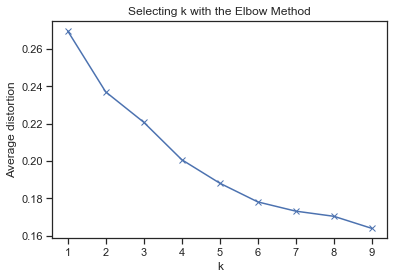

In [166]:
#The Elbow method

from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(X_norm) 
    meandistortions.append(sum(np.min(cdist(X_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 


### K Means Clustering

In [167]:
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)

In [168]:
k_means.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [169]:
k_means.labels_

array([3, 3, 3, ..., 4, 4, 1])

In [170]:
k_means.cluster_centers_

array([[-8.64132749e-02,  2.74709413e-02, -2.35940101e-02,
        -3.32593422e-03, -1.17368727e-02, -4.62838553e-03,
        -1.67132453e-02, -1.99344798e-01,  8.29123378e-02,
        -1.64859922e-02],
       [ 6.97399489e-03, -3.44611717e-03, -2.41861852e-02,
        -1.75133153e-02, -1.48206308e-02,  3.35697100e-04,
        -9.96109783e-03,  4.36548584e-02,  4.29926983e-02,
        -8.29862608e-03],
       [ 1.07404602e-01,  5.32868885e-02,  6.09052305e-01,
         5.19759591e-02,  1.04721909e-01,  1.48660254e-02,
         7.05698226e-02, -5.17547641e-02,  1.15463610e-01,
         3.50625139e-02],
       [ 2.74654091e-01,  4.46178180e-02, -1.90881641e-02,
         1.06968845e-01,  1.29932243e-01,  1.26226517e-02,
         1.10713108e-01,  6.38368699e-02,  1.06027313e-01,
         8.57775131e-02],
       [-9.76371092e-02, -3.55128360e-02, -2.71825874e-02,
        -2.46971667e-02, -4.14696438e-02, -5.53937644e-03,
        -3.32879885e-02,  1.78122181e-02, -1.69248393e-01,
        -2.

In [171]:
m3Regression1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
m3Regression1.head()



cluster
0        3
1        3
2        3
3        2
4        3

In [172]:
m3Regression = m3Regression.reset_index(drop=True)
m3Regression1 = m3Regression1.reset_index(drop=True)

m3Regression3 = m3Regression.join(m3Regression1)
m3Regression3.head()

num_critic_for_reviews  duration  director_facebook_likes        gross  \
0                   723.0     178.0                      0.0  760505847.0   
1                   302.0     169.0                    563.0  309404152.0   
2                   602.0     148.0                      0.0  200074175.0   
3                   813.0     164.0                  22000.0  448130642.0   
4                   462.0     132.0                    475.0   73058679.0   

   num_voted_users  cast_total_facebook_likes  num_user_for_reviews  \
0           886204                       4834                3054.0   
1           471220                      48350                1238.0   
2           275868                      11700                 994.0   
3          1144337                     106759                2701.0   
4           212204                       1873                 738.0   

   title_year  imdb_score  movie_facebook_likes  cluster  
0      2009.0         7.9                 33000        3  
1      2007.0         7.1                     0        3  
2      2015.0         6.8                 85000        3  
3      2012.0         8.5                164000        2  
4      2012.0         6.6                 24000        3

In [173]:
px.scatter(m3Regression3, x="num_voted_users", y="imdb_score", color="cluster", marginal_y="violin", marginal_x="violin", size='gross', trendline="ols", hover_name='imdb_score')


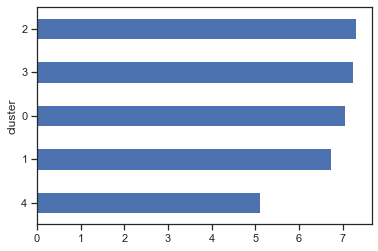

In [174]:
m3Regression3.groupby('cluster')['imdb_score'].mean().sort_values(ascending=True).plot(kind='barh')


   - Top Performing K Means Cluster (Cluster 2) IMDB Score:  7.30
    
        - Duration:                  125.05
        - Director Facebook Likes:   14730
        - Gross:                     88.73 Million 
        - Number Voted Users:        267289
        - Cast Total Facebook Likes: 20080
        - Number User for Reviews:   649
        - Movie Facebook Likes:      20323
        


In [175]:
cluster2 = m3Regression3[(m3Regression3['cluster']==2)]

 

In [176]:
cluster2.mean()

num_critic_for_reviews       2.373161e+02
duration                     1.250517e+02
director_facebook_likes      1.472989e+04
gross                        8.873096e+07
num_voted_users              2.672886e+05
cast_total_facebook_likes    2.007959e+04
num_user_for_reviews         6.493333e+02
title_year                   1.998328e+03
imdb_score                   7.299425e+00
movie_facebook_likes         2.032277e+04
cluster                      2.000000e+00
dtype: float64

In [177]:
cluster2.head()



num_critic_for_reviews  duration  director_facebook_likes        gross  \
3                    813.0     164.0                  22000.0  448130642.0   
32                   451.0     108.0                  13000.0  334185206.0   
47                   590.0     132.0                  14000.0  228756232.0   
53                   470.0     122.0                  14000.0  317011114.0   
65                   645.0     152.0                  22000.0  533316061.0   

    num_voted_users  cast_total_facebook_likes  num_user_for_reviews  \
3           1144337                     106759                2701.0   
32           306320                      79957                 736.0   
47           395573                      21411                1171.0   
53           333847                      14959                2054.0   
65          1676169                      57802                4667.0   

    title_year  imdb_score  movie_facebook_likes  cluster  
3       2012.0         8.5                164000        2  
32      2010.0         6.5                 24000        2  
47      2013.0         7.8                 92000        2  
53      2008.0         6.2                  5000        2  
65      2008.0         9.0                 37000        2

In [178]:
m3Regression3[(m3Regression3['cluster']==0)].mean()

num_critic_for_reviews       7.993598e+01
duration                     1.170488e+02
director_facebook_likes      1.790198e+02
gross                        4.667356e+07
num_voted_users              7.050143e+04
cast_total_facebook_likes    7.277027e+03
num_user_for_reviews         2.077683e+02
title_year                   1.985192e+03
imdb_score                   7.048780e+00
movie_facebook_likes         2.332341e+03
cluster                      0.000000e+00
dtype: float64

In [179]:
m3Regression3[(m3Regression3['cluster']==1)].mean()

num_critic_for_reviews       1.558200e+02
duration                     1.074653e+02
director_facebook_likes      1.654753e+02
gross                        3.589582e+07
num_voted_users              6.531951e+04
cast_total_facebook_likes    1.054036e+04
num_user_for_reviews         2.419963e+02
title_year                   2.006823e+03
imdb_score                   6.741632e+00
movie_facebook_likes         5.192159e+03
cluster                      1.000000e+00
dtype: float64

In [180]:
m3Regression3[(m3Regression3['cluster']==3)].mean()

num_critic_for_reviews       3.731227e+02
duration                     1.223643e+02
director_facebook_likes      2.826543e+02
gross                        1.305534e+08
num_voted_users              3.098879e+05
cast_total_facebook_likes    1.860630e+04
num_user_for_reviews         8.524182e+02
title_year                   2.008615e+03
imdb_score                   7.226766e+00
movie_facebook_likes         3.802230e+04
cluster                      3.000000e+00
dtype: float64

In [181]:
m3Regression3[(m3Regression3['cluster']==4)].mean()

num_critic_for_reviews       7.080888e+01
duration                     9.753053e+01
director_facebook_likes      9.642347e+01
gross                        3.040710e+07
num_voted_users              2.025243e+04
cast_total_facebook_likes    6.676887e+03
num_user_for_reviews         1.239064e+02
title_year                   2.004515e+03
imdb_score                   5.108089e+00
movie_facebook_likes         9.785884e+02
cluster                      4.000000e+00
dtype: float64

### Agglomerative Clustering

In [182]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward



In [183]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X_norm)
agg.labels_


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

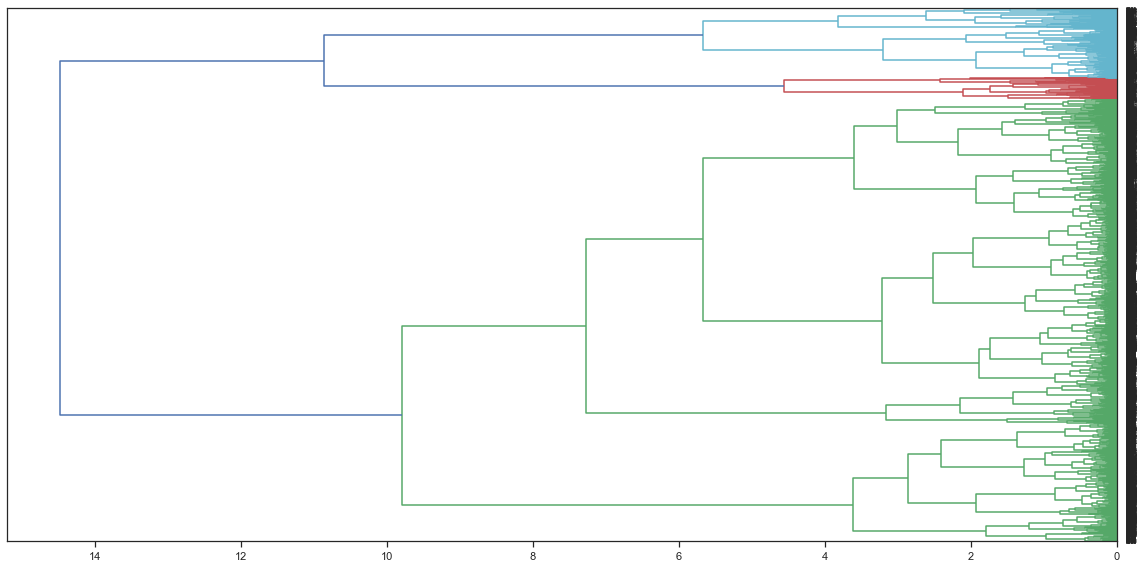

In [184]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X_norm)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() 

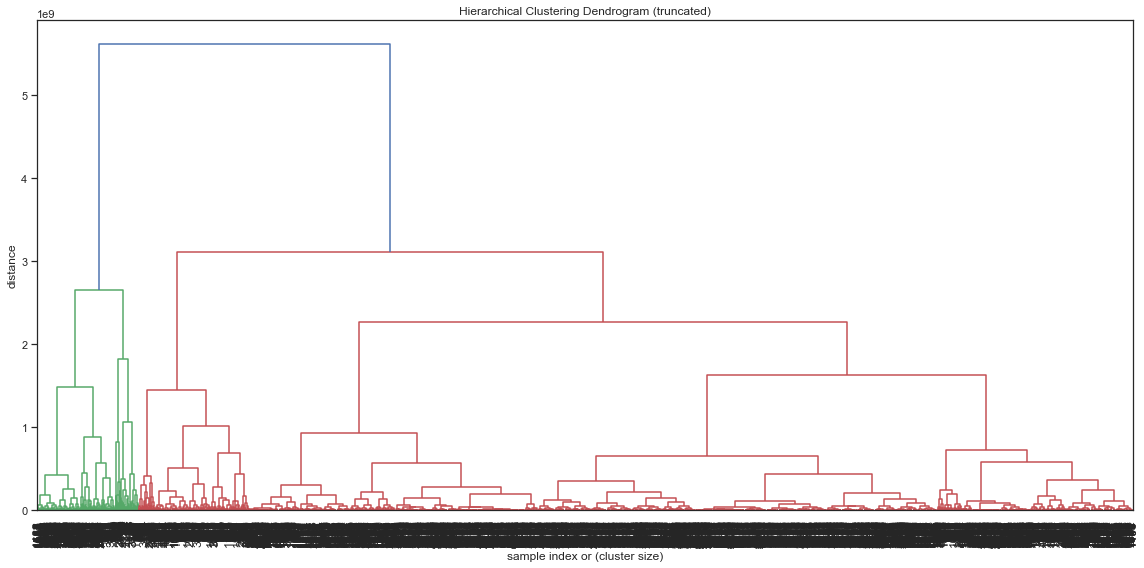

In [185]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout()


In [186]:
m3Regression5 = pd.DataFrame(agg.labels_, columns = ['cluster'])
m3Regression5.head()

cluster
0        1
1        1
2        1
3        2
4        1

In [187]:
m3Regression = m3Regression.reset_index(drop=True)
m3Regression5 = m3Regression5.reset_index(drop=True)

m3Regression6 = m3Regression.join(m3Regression5)
m3Regression6.head()

num_critic_for_reviews  duration  director_facebook_likes        gross  \
0                   723.0     178.0                      0.0  760505847.0   
1                   302.0     169.0                    563.0  309404152.0   
2                   602.0     148.0                      0.0  200074175.0   
3                   813.0     164.0                  22000.0  448130642.0   
4                   462.0     132.0                    475.0   73058679.0   

   num_voted_users  cast_total_facebook_likes  num_user_for_reviews  \
0           886204                       4834                3054.0   
1           471220                      48350                1238.0   
2           275868                      11700                 994.0   
3          1144337                     106759                2701.0   
4           212204                       1873                 738.0   

   title_year  imdb_score  movie_facebook_likes  cluster  
0      2009.0         7.9                 33000        1  
1      2007.0         7.1                     0        1  
2      2015.0         6.8                 85000        1  
3      2012.0         8.5                164000        2  
4      2012.0         6.6                 24000        1

In [188]:
px.scatter(m3Regression6, x="num_voted_users", y="imdb_score", color="cluster", marginal_y="violin", marginal_x="violin",size='gross', trendline="ols", hover_name='imdb_score')


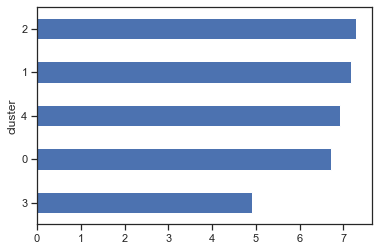

In [189]:
m3Regression6.groupby('cluster')['imdb_score'].mean().sort_values(ascending=True).plot(kind='barh')


   - Top Performing Aglomerrative (Cluster 2) IMDB Score:  7.28
  
        - Duration:                  125.06
        - Director Facebook Likes:   14709
        - Gross:                     88.23 Million 
        - Number Voted Users:        265941
        - Cast Total Facebook Likes: 19969
        - Number User for Reviews:   647
        - Movie Facebook Likes:      20207

In [190]:
m3Regression6[(m3Regression6['cluster']==0)].mean()

num_critic_for_reviews       1.307507e+02
duration                     1.085361e+02
director_facebook_likes      1.597734e+02
gross                        3.708866e+07
num_voted_users              6.476089e+04
cast_total_facebook_likes    9.535044e+03
num_user_for_reviews         2.350152e+02
title_year                   2.004380e+03
imdb_score                   6.712855e+00
movie_facebook_likes         3.844938e+03
cluster                      0.000000e+00
dtype: float64

In [191]:
m3Regression6[(m3Regression6['cluster']==1)].mean()

num_critic_for_reviews       3.658492e+02
duration                     1.215441e+02
director_facebook_likes      2.756695e+02
gross                        1.175824e+08
num_voted_users              2.821102e+05
cast_total_facebook_likes    1.823943e+04
num_user_for_reviews         7.549322e+02
title_year                   2.008573e+03
imdb_score                   7.183051e+00
movie_facebook_likes         3.696610e+04
cluster                      1.000000e+00
dtype: float64

In [192]:
m3Regression6[(m3Regression6['cluster']==2)].mean()

num_critic_for_reviews       2.365886e+02
duration                     1.250629e+02
director_facebook_likes      1.470857e+04
gross                        8.822565e+07
num_voted_users              2.659407e+05
cast_total_facebook_likes    1.996940e+04
num_user_for_reviews         6.466514e+02
title_year                   1.998400e+03
imdb_score                   7.282286e+00
movie_facebook_likes         2.020664e+04
cluster                      2.000000e+00
dtype: float64

In [193]:
m3Regression6[(m3Regression6['cluster']==3)].mean()

num_critic_for_reviews       7.526892e+01
duration                     9.736155e+01
director_facebook_likes      8.693625e+01
gross                        3.369553e+07
num_voted_users              2.149234e+04
cast_total_facebook_likes    7.769662e+03
num_user_for_reviews         1.286444e+02
title_year                   2.005118e+03
imdb_score                   4.903386e+00
movie_facebook_likes         1.214840e+03
cluster                      3.000000e+00
dtype: float64

In [194]:
m3Regression6[(m3Regression6['cluster']==4)].mean()

num_critic_for_reviews       8.907808e+01
duration                     1.104505e+02
director_facebook_likes      1.705676e+02
gross                        4.259036e+07
num_voted_users              5.220602e+04
cast_total_facebook_likes    4.582000e+03
num_user_for_reviews         1.976126e+02
title_year                   1.978201e+03
imdb_score                   6.921922e+00
movie_facebook_likes         2.173435e+03
cluster                      4.000000e+00
dtype: float64

Way Ahead:

Improve accuracy

- Re-examine original data gathered for the project
    - Genre
    - Poster Faces
- Refine regression and classification models
- Reassess factors used for cluster modeling

Deploy revised models

# Storytelling and Presentation Outline

Overall Project Goal:  Predict success of movies based on information available on the internet movie data base, imdb.com.  

This project builds upon the exploratory analysis created in the first phase of this project

Recap of initial findings:

    - The data required significant preparation
    - Several ways to segment the imdb data set
    - Correlation Analysis revealed several strong relationships
    - Introduced a very labor intensive model of quintessential top tier movies

The second of three phases of this project develops predictive models using regression and classification techniques. 

    -  Although similar, regression and classification modeling require different preparations
    -  Several revisions made to the phase one data set, primarily to allow for categorical analysis
    -  As a result, two dataframes developed
    
        - m3Regression
        - m3
   
Lets take a look at the M3Regression dataframe and its role in subsequent regression modeling techniques

    - The factors used for regression models are continuous.  
    - For the purposes of this project these models do not include categorical values 
    - Correlation Results:  Big Table, Complicated Chart, Easy List  

Five regression models built:

    - All models used the m3Regression dataframe
    - Overall models did not perform especially well
    - Rank order of Models by R-squared value:
    
        - Lasso Linear Regression R-squared 0.323
        - Extra Tree Classifier Feature Selection R-squared 0.315
        - Ordinary Least Squared with all variables R-squared 0.293
        - Feature Selection R-squared 0.274
        - Ordinary Least Squared with top four variables R-squared 0.272

In short, not a satisfying result, so lets turn to a different, more relevent technique:

Classification modeling techniques

    - These techniques allow for the use of continous and categorical values
    - Given the imdb data available, these techniques should yield more relevent results
    - Uses the m3 dataframe, with its categorical results
    
    - All models used the comprehensive m3 dataframe
    - Overall models did not perform especially well
    - Dataframe revisions that incorporated social media factors had a marginal impact
    - Rank order of models by accuracy:
    
        - Random Forest Accuracy 0.514
        - Full Depth Decision Tree  Accuracy 0.432 
        - Simplified 3 Deep Decision Tree Accuracy 0.408
        - K Nearest Neighbor Accuracy 0.292
        
Lets examine the random forest model

    - Not a completely satisfying result because it hides the factors that led to these results
    - The accuacy is much better than the other two options, but only slightly above 50%

The final phase of this project uses clustering techniques to use artificial intelligence to reveal groupings 

Cluster Analysis

Two cluster models developed:

    - All models used the comprehensive m3 dataframe
    - Elbow method used to determine an optimal 5 clusters
    - Both top clusters are similar, but the K Means has consistently higher values
    
Lets look at the K Means Cluster Set:  

    - Top Performing K Means Cluster (Cluster 3) IMDB Score:  7.50
    
        - Duration:                  129.93
        - Director Facebook Likes:   296
        - Gross:                     183.55 Million
        - Number Voted Users:        423003
        - Cast Total Facebook Likes: 21469
        - Number User for Reviews:   1111
        - Movie Facebook Likes:      48520

Now lets look at the Agglomerative  Cluster Set

    - Top Performing Agglomerative  (Cluster 2) IMDB Score:  7.44
  
        - Duration:                  124.45
        - Director Facebook Likes:   287
        - Gross:                     149.43 Million
        - Number Voted Users:        371000
        - Cast Total Facebook Likes: 19701
        - Number User for Reviews:   985
        - Movie Facebook Likes:      42939

Way Ahead:

Improve accuracy.

    - Re-examine original data gathered for the project
    
        - Genre
        - Poster Faces

Test models.

    - Conduct prediction of IMDB scores using new data from imdb.com
       

   

# References.

Includes all references from mid-term project

github.io, pandas qcut. http://pandas-docs.github.io/pandas-docs-travis/reference/api/pandas.qcut.html?highlight=qcut#pandas.qcut

ibm.com, Markdown for Jupyter Notebook Cheatsheet. https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html

imdb.com, What is IMDB. https://help.imdb.com/article/imdb/general-information/what-is-imdb/G836CY29Z4SGNMK5?ref_=helpsect_cons_1_1#

nycdatascience.com, Movie rating prediction. https://nycdatascience.com/blog/student-works/machine-learning/movie-rating-prediction/

packthub.com, Big data and business intelligence.  https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn

scipy.org, Spatial distance.  http://docs.scipy.org/doc/scipy/reference/spatial.distance.htm

stackoverflow.com, Convert pandas column to dateline. https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime

stackoverflow.com, Is there a not equal operator in python. https://stackoverflow.com/questions/11060506/is-there-a-not-equal-operator-in-python

stackoverflow.com, Pandas convert column with year integer to datetime. https://stackoverflow.com/questions/46658232/pandas-convert-column-with-year-integer-to-datetime

stackoverflow.com, ValueError: Unknown label type: 'continuous'. https://stackoverflow.com/questions/43211239/valueerror-unknown-label-type-continuous

stackoverflow.com, What is the difference between pandas qcut and pandas cut. https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut

sebastianrascka.com, ipython internal links. https://sebastianraschka.com/Articles/2014_ipython_internal_links.html
